In [73]:
import pandas as pd
import numpy as np

In [74]:
import gensim
import os

In [75]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

story = []
for filename in os.listdir('GoT Books Dataset'):
    f = open(os.path.join('GoT Books Dataset', filename), encoding='latin-1')
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [76]:
len(story)

145020

In [77]:
# Training the model

model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [78]:
model

In [79]:
model.build_vocab(story)

In [80]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(6569478, 8628190)

In [81]:
model.wv.index_to_key

['the',
 'and',
 'to',
 'of',
 'he',
 'his',
 'was',
 'you',
 'her',
 'in',
 'it',
 'had',
 'that',
 'she',
 'as',
 'with',
 'him',
 'not',
 'but',
 'for',
 'they',
 'is',
 'at',
 'on',
 'said',
 'my',
 'have',
 'be',
 'lord',
 'them',
 'no',
 'from',
 'would',
 'were',
 'me',
 'your',
 'one',
 'all',
 'when',
 'will',
 'ser',
 'if',
 'so',
 'their',
 'we',
 'could',
 'are',
 'man',
 'there',
 'this',
 'up',
 'been',
 'what',
 'did',
 'by',
 'king',
 'do',
 'men',
 'back',
 'out',
 'more',
 'or',
 'who',
 'down',
 'well',
 'than',
 'only',
 'like',
 'jon',
 'some',
 'father',
 'old',
 'hand',
 'even',
 'too',
 'tyrion',
 'before',
 'never',
 'an',
 'off',
 'see',
 'know',
 'into',
 'made',
 'now',
 'eyes',
 'black',
 'told',
 'lady',
 'thought',
 'time',
 'then',
 'how',
 'long',
 'has',
 'can',
 'might',
 'us',
 'come',
 'where',
 'here',
 'through',
 'still',
 'face',
 'head',
 'red',
 'll',
 'way',
 'boy',
 'page',
 'must',
 'once',
 'queen',
 'good',
 'two',
 'brother',
 'night',
 

In [82]:
model.wv.most_similar('throne') # wv => word to vec

[('baratheon', 0.7411847710609436),
 ('council', 0.7243095636367798),
 ('aegon', 0.7139337062835693),
 ('fleet', 0.7111124396324158),
 ('iron', 0.700592041015625),
 ('islands', 0.6917970776557922),
 ('sits', 0.6864191293716431),
 ('fealty', 0.6813181638717651),
 ('tommen', 0.6742298007011414),
 ('crown', 0.6727672815322876)]

In [83]:
model.wv['tyrion']

array([ 0.06730769,  0.15003462, -0.02118309, -0.6380992 ,  1.1931124 ,
        0.24116834,  0.70555234, -0.3418855 , -1.1681819 ,  0.44639552,
        0.52517337,  2.0882387 ,  0.9071114 , -1.4545448 , -0.4341035 ,
       -1.8646305 , -0.8132804 ,  0.54607993,  0.9367563 , -0.22630626,
       -0.1739787 , -1.3949016 ,  1.1595744 , -1.3760635 ,  1.5768452 ,
        1.5593001 ,  0.62411124, -0.14315167, -1.0552242 , -1.0156894 ,
       -0.6799594 , -0.8781839 , -0.8873652 , -0.9641719 ,  1.8270454 ,
       -0.31867066, -1.1704277 , -0.23595753,  0.72228134, -0.8642921 ,
       -1.0367371 , -1.7362505 , -0.27569696,  1.0607553 ,  0.00911049,
       -3.7498868 , -1.4306412 ,  0.9630135 , -1.0424385 ,  0.49538743,
        0.6760684 , -0.16778478, -0.81924593, -0.06381428, -0.7563383 ,
        0.3918002 , -0.6041545 , -0.5454375 ,  0.18314192, -1.8369612 ,
        0.7435454 ,  0.8068017 ,  1.881717  , -1.2237389 , -1.495476  ,
        0.64280695,  1.3592036 ,  2.2020233 , -0.48217788,  0.23

In [84]:
model.wv['tyrion'].shape

(100,)

100 was default, can change in the parameter

In [85]:
model.wv.similarity('arya', 'dragon')

0.05696346

In [86]:
model.wv.similarity('daenerys', 'dragon')

0.43572366

In [87]:
model.wv.similarity('daenerys', 'queen')

0.70203054

In [88]:
model.wv.get_normed_vectors()

array([[-0.14263745, -0.05975263,  0.0627078 , ..., -0.16202955,
         0.00941877,  0.05776557],
       [-0.04621784, -0.08069225,  0.14235836, ..., -0.07908558,
        -0.02109952,  0.09487016],
       [ 0.13573198, -0.0185556 , -0.16394247, ..., -0.06426151,
         0.08321091, -0.08065454],
       ...,
       [ 0.08720043,  0.00647471, -0.03903414, ..., -0.16234586,
         0.11597299, -0.15900896],
       [-0.02379171,  0.09011717,  0.12339691, ..., -0.03999419,
         0.10481162, -0.10437564],
       [-0.08795433,  0.08381493,  0.0996961 , ..., -0.09097398,
         0.10255408, -0.03254125]], dtype=float32)

In [89]:
model.wv.get_normed_vectors().shape # Vocabulary

(17453, 100)

In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [91]:
X = pca.fit_transform(model.wv.get_normed_vectors())

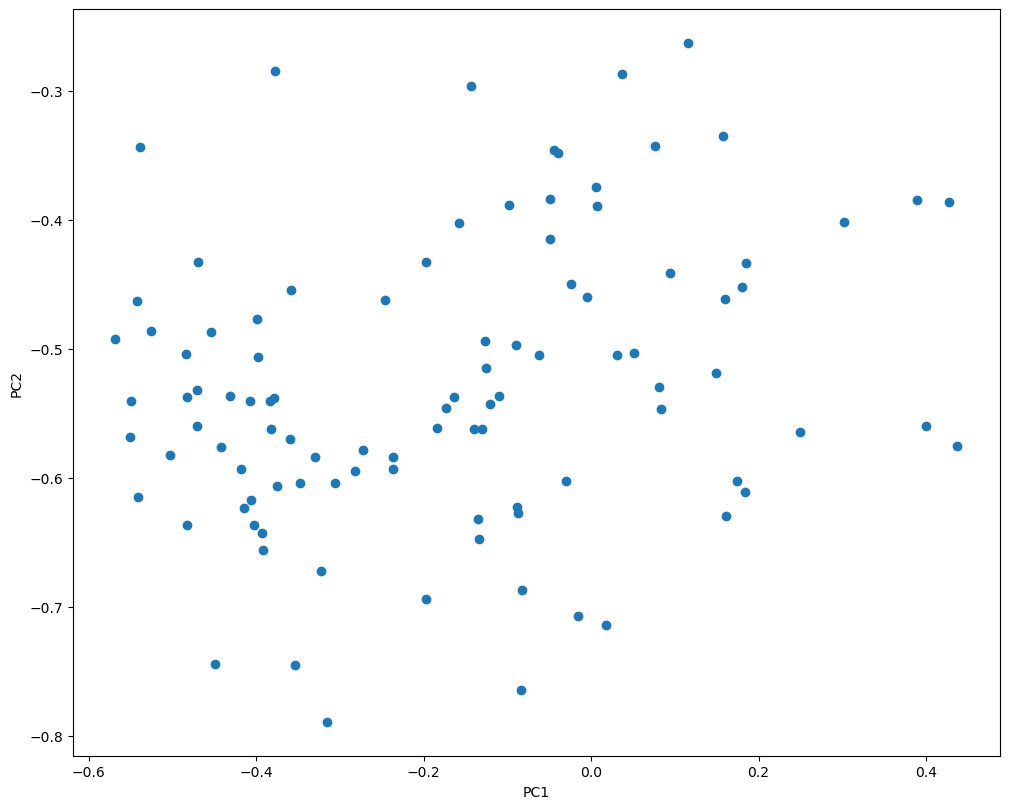

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(X[:100, 0], X[:100, 1])
plt.tight_layout()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [93]:
pca_1 = PCA(n_components=3)
X_1 = pca_1.fit_transform(model.wv.get_normed_vectors())
import plotly.express as px
fig = px.scatter_3d(X_1[:100], x = 0, y = 1, z = 2, color=model.wv.index_to_key[:100])
fig.show()
